# Adversarial Variational Optimization: Circle benchmark

In [1]:
import cag
import torch
import matplotlib.pyplot as plt

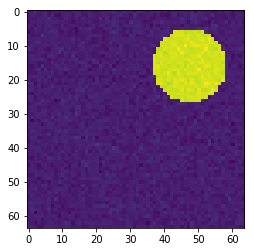

In [2]:
from cag.benchmark.circle import allocate_observations

# Allocate the true observations.
true_radius = .3
true_x = .5
true_y = .5
theta = [true_radius, true_x, true_y]
theta_true, x_o = allocate_observations(theta, 128)

x_o = x_o + torch.rand_like(x_o)

# Show the mean observation.
plt.imshow(x_o.mean(dim=0).numpy())
plt.show()

## AVO

### Discriminator

In [3]:
class Discriminator(torch.nn.Module):
    
    def __init__(self, simulator_resolution=64):
        super(Discriminator, self).__init__()
        self._simulator_resolution = simulator_resolution
        self._model = torch.nn.Sequential(
            torch.nn.Linear(simulator_resolution ** 2, 800),
            torch.nn.PReLU(),
            torch.nn.Linear(800, 600),
            torch.nn.PReLU(),
            torch.nn.Linear(600, 1),
            torch.nn.Sigmoid()
        )
        
    def forward(self, x):
        x = x.view(-1, self._simulator_resolution ** 2)
        y_hat = self._model(x)
        
        return y_hat
    
    
discriminator = Discriminator()

### Simulator

In [4]:
from cag.benchmark.circle import CircleSimulator as Simulator

simulator = Simulator()

### Proposal

In [5]:
from cag.proposal import MultivariateNormalProposal

mean = torch.zeros(3)
sigma = torch.eye(3)
proposal = MultivariateNormalProposal(mean, sigma)

### Inference

In [ ]:
from cag.method import AdversarialVariationalOptimization
from cag.baseline import MeanBaseline

discriminator = Discriminator()
avo = AdversarialVariationalOptimization(simulator, discriminator, proposal)

In [ ]:
avo.infer(x_o)

In [ ]:
avo.proposal._mu